**Librerias**

In [491]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

**Revisión de Datos**

In [492]:
path = 'Data/data-even.csv'
data = pd.read_csv(path)

data

,Age,Education,EducationNum,MaritalStatus,Relationship,Gender,CapitalGain,HoursPerWeek
0,39,Bachelors,13,Never-married,Not-in-family,Male,2174,40
1,50,Bachelors,13,Married-civ-spouse,Husband,Male,0,13
2,52,HS-grad,9,Married-civ-spouse,Husband,Male,0,45
3,30,Bachelors,13,Married-civ-spouse,Husband,Male,0,40
4,25,HS-grad,9,Never-married,Own-child,Male,0,35
...,...,...,...,...,...,...,...,...
9860,39,Assoc-acdm,12,Married-civ-spouse,Wife,Female,0,20
9861,65,Prof-school,15,Never-married,Not-in-family,Male,1086,60
9862,43,Some-college,10,Divorced,Other-relative,Female,0,40
9863,43,Some-college,10,Married-civ-spouse,Husband,Male,0,50


In [493]:
data.describe()

,Age,EducationNum,CapitalGain,HoursPerWeek
count,9865.000000,9865.000000,9865.000000,9865.000000
mean,42.686163,10.543031,1511.164420,40.829397
std,14.539611,2.685759,9209.395181,14.543395
min,17.000000,1.000000,0.000000,1.000000
25%,32.000000,9.000000,0.000000,38.000000
50%,42.000000,10.000000,0.000000,40.000000
75%,53.000000,13.000000,0.000000,48.000000
max,90.000000,16.000000,99999.000000,99.000000


In [494]:
print("El cojunto de datos original tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos original tiene 9865 observaciones y 8 columnas
Las columnas son: ['Age', 'Education', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


**Variables**

- Age: Edad en años.
- Education: nivel de educación.
- Education Num: años de educación(versión númerica de education).
- Marital Status: Estado marital.
- Relationship: rola familiar.
- Gender: Genero.
- Capital Gain: Ganancias desde la capital.
- Hours per week: Horas trabajadas por semana. 

¿Hay columnas innecesarias?

La columna de **'Education'** ya tiene una equivalencia numerica en la columna **'EducationNum'**, por lo tanto sería redundante convertir esa columna categorica a una númerica. 

In [495]:
data.drop(data.columns[1], inplace=True, axis=1)
print("El cojunto de datos ahora tiene {} observaciones y {} columnas".format(data.shape[0], data.shape[1]))
print("Las columnas son: {}".format(data.columns.tolist()))

El cojunto de datos ahora tiene 9865 observaciones y 7 columnas
Las columnas son: ['Age', 'EducationNum', 'MaritalStatus', 'Relationship', 'Gender', 'CapitalGain', 'HoursPerWeek']


¿Hay valores vacios en la hoja de datos?

In [496]:
print("Valores faltantes en cada columna:\n{}".format(data.isnull().sum()))

Valores faltantes en cada columna:
Age              0
EducationNum     0
MaritalStatus    0
Relationship     0
Gender           0
CapitalGain      0
HoursPerWeek     0
dtype: int64


Notamos que no hay variables faltantes en el conjunto de datos lo cual es excelente ya que no necesitamos modificarlo.

**Tipo de datos por columna**

In [497]:
print("Tipo de datos por cada columna:\n{}".format(data.dtypes))

Tipo de datos por cada columna:
Age               int64
EducationNum      int64
MaritalStatus    object
Relationship     object
Gender           object
CapitalGain       int64
HoursPerWeek      int64
dtype: object


Hay 4 variables númericas (todas con valores enteros) y 3 categoricas.

**Análisis de Variables Categoricas**

In [498]:
print("Valores de cada columna categorica:")
for columna in data.select_dtypes(include=[object]):
    print(columna, ":", data[columna].unique())

Valores de cada columna categorica:
MaritalStatus : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Widowed' ' Married-AF-spouse']
Relationship : [' Not-in-family' ' Husband' ' Own-child' ' Unmarried' ' Wife'
 ' Other-relative']
Gender : [' Male' ' Female']


Para **MaritalStatus** y **Relationship** notamos que tienen varios estados pero no hay un orden natural visible entre ellos. 

Sin embargo, **Gender** es facilmente clasificable entre fememino y masculino.

**Preprocesado**

Convertir variables categoricas a númericas. 

- MaritalStatus
- Relationship
- Gender

In [499]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer


num_cols = ['Age', 'EducationNum', 'CapitalGain', 'HoursPerWeek']
cat_cols = ['MaritalStatus', 'Relationship', 'Gender']


ct = ColumnTransformer(
    [
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'  ), cat_cols)
    ]
)

cluster_data = ct.fit_transform(data)

cluster_df = pd.DataFrame(
    cluster_data,
    columns=ct.get_feature_names_out()
)

cluster_df

,num__Age,num__EducationNum,num__CapitalGain,num__HoursPerWeek,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Relationship_ Not-in-family,cat__Relationship_ Other-relative,cat__Relationship_ Own-child,cat__Relationship_ Unmarried,cat__Relationship_ Wife,cat__Gender_ Male
0,-0.253538,0.914860,0.071977,-0.057032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.503054,0.914860,-0.164098,-1.913639,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.640616,-0.574552,-0.164098,0.286784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.872568,0.914860,-0.164098,-0.057032,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.216474,-0.574552,-0.164098,-0.400848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,-0.253538,0.542507,-0.164098,-1.432296,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9861,1.534771,1.659567,-0.046169,1.318232,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9862,0.021586,-0.202199,-0.164098,-0.057032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9863,0.021586,-0.202199,-0.164098,0.630600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [500]:
cluster_df.describe()

,num__Age,num__EducationNum,num__CapitalGain,num__HoursPerWeek,cat__MaritalStatus_ Married-AF-spouse,cat__MaritalStatus_ Married-civ-spouse,cat__MaritalStatus_ Married-spouse-absent,cat__MaritalStatus_ Never-married,cat__MaritalStatus_ Separated,cat__MaritalStatus_ Widowed,cat__Relationship_ Not-in-family,cat__Relationship_ Other-relative,cat__Relationship_ Own-child,cat__Relationship_ Unmarried,cat__Relationship_ Wife,cat__Gender_ Male
count,9.865000e+03,9.865000e+03,9.865000e+03,9.865000e+03,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000,9865.000000
mean,-1.854686e-16,2.931484e-16,2.773025e-17,-1.278473e-17,0.000811,0.531576,0.011759,0.253117,0.027471,0.041054,0.233046,0.020983,0.121744,0.098125,0.057679,0.693969
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,0.028467,0.499027,0.107804,0.434819,0.163459,0.198426,0.422793,0.143335,0.327006,0.297498,0.233147,0.460866
min,-1.766723e+00,-3.553378e+00,-1.640977e-01,-2.738798e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.350063e-01,-5.745524e-01,-1.640977e-01,-1.945584e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-4.719507e-02,-2.021993e-01,-1.640977e-01,-5.703200e-02,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.093972e-01,9.148602e-01,-1.640977e-01,4.930738e-01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.254299e+00,2.031920e+00,1.069482e+01,3.999998e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**K-Means**

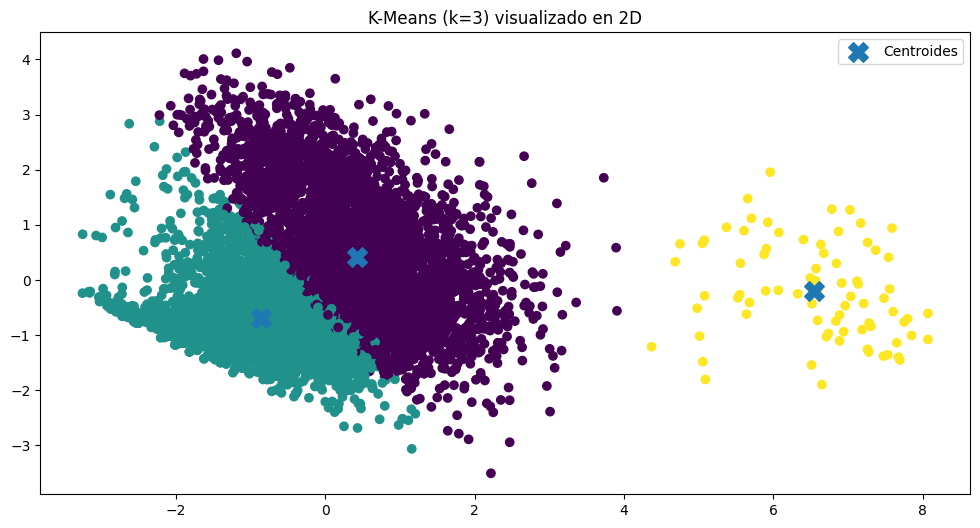

In [501]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
kmeans.fit(cluster_data)
labels = kmeans.labels_

# PCA a 2D para visualización
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(cluster_data)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Graficar
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(X_pca[:,0], X_pca[:,1], c=labels) 
ax.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=200, label='Centroides')
ax.set_title(f"K-Means (k={k}) visualizado en 2D")
ax.legend()
plt.show()

**Prueba del Codo**

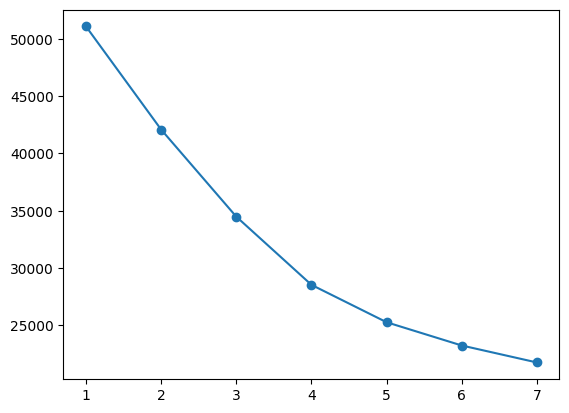

In [502]:
clusters_range = [1,2,3,4,5,6,7]
inertias = []
for c in clusters_range:
    kmeans = KMeans(n_clusters=c, n_init=20).fit(cluster_data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')